In [31]:
# Data Analysis and Visualisation Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import folium

# Removing warnings
import warnings
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv('Airbnb Listings Bangkok_clean.csv',
                 parse_dates=['last_review'])
df

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaT,0.00,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaT,0.00,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaT,0.00,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15839,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaT,0.00,1,362,0
15840,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaT,0.00,14,365,0
15841,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaT,0.00,14,365,0
15842,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaT,0.00,14,365,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15844 entries, 0 to 15843
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15844 non-null  int64         
 1   name                            15844 non-null  object        
 2   host_id                         15844 non-null  int64         
 3   host_name                       15844 non-null  object        
 4   neighbourhood                   15844 non-null  object        
 5   latitude                        15844 non-null  float64       
 6   longitude                       15844 non-null  float64       
 7   room_type                       15844 non-null  object        
 8   price                           15844 non-null  int64         
 9   minimum_nights                  15844 non-null  int64         
 10  number_of_reviews               15844 non-null  int64         
 11  la

## **Business Problem: Optimizing Pricing Strategy**

An AirBnB business relies on setting the right price for each listing to attract guests while maximizing revenue. However, setting the optimal price can be challenging as it depends on various factors such as location, room type, minimum number of nights, and availability. From the data provided, discover whether the prices of listings are fair or not, and deduce factors which may affect the popularity of the listings.

## **Analysis Steps:**
### **Fairness of Price**
1. Price vs. Room Type
2. Price vs. Neighborhood
### **Factors affecting Popularity**
3. Hosts vs. Popularity
4. Non-English Listings vs. Popularity
5. Price / Minimum Nights vs Occupancy Rate

### **1. Price per Room Type** <br>
Aims: Finding average price by room type and distribution of prices. Are the prices of the room types fair?

In [34]:
max_price = df['price'].max()
# Finding the lowest price where price is not equal to 0
min_price = df[df['price'] > 0]['price'].min()
print(f'Maximum price = {max_price}')
print(f'Minimum price = {min_price}')

Maximum price = 1100000
Minimum price = 278


In [35]:
from scipy.stats import iqr
q3 = df['price'].describe()['75%']
print(f'Q3 value = {q3}')
q1 = df['price'].describe()['25%']
print(f'Q1 value = {q1}')
upperbound = q3 + (iqr(df['price'])*1.5)
print(f'Upper bound value= {upperbound}')
lowerbound = q1 - (iqr(df['price'])*1.5)
print(f'Lower bound value= {lowerbound}')

Q3 value = 2430.25
Q1 value = 900.0
Upper bound value= 4725.625
Lower bound value= -1395.375


In [36]:
# We will ignore lowerbound because price > 0, and lowerbound is negative (-1393.5).
outliers = len(df[df['price'] > upperbound])
total = len(df)
print(outliers/total)

0.08842464024236305


There is an extremely large spread in price. The cheapest price is $278 while the most expensive price is $1,100,000. <br>
Since there is a significant number of outliers (8.8% of data), we will temporarily not remove these outliers for now. <br>
We will be creating 2 separate plots:
- Plot 1: Prices within the upperbound price, rounded to the nearest thousand.
    - Upperbound = 4722.5. We will round this up to 5000.
    - The lower bound is 0, since prices cannot be negative, and lowerbound = -1393.5.
- Plot 2: Prices beyond the upperbound price.

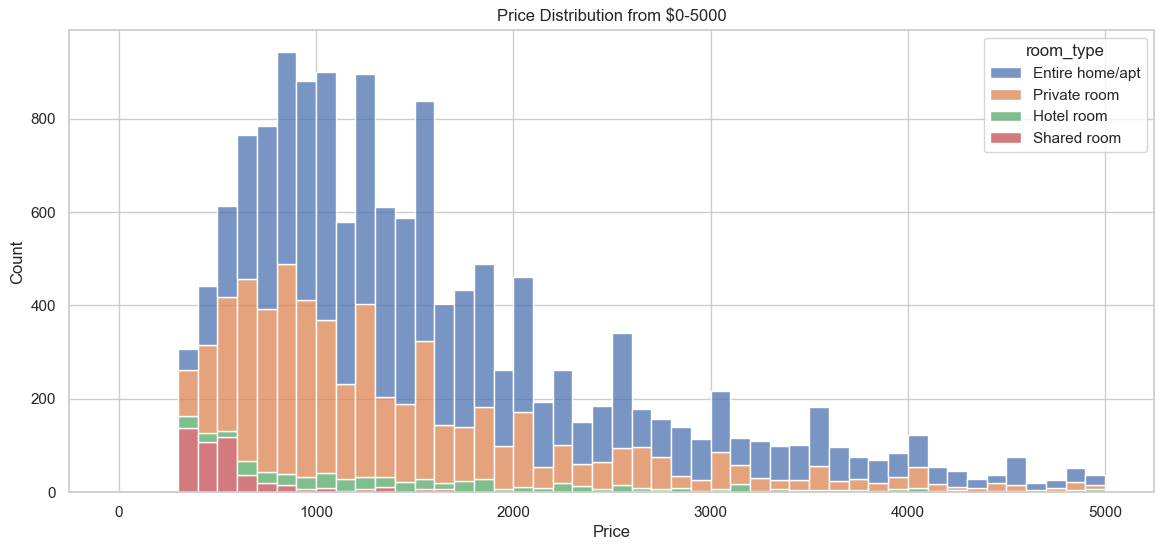

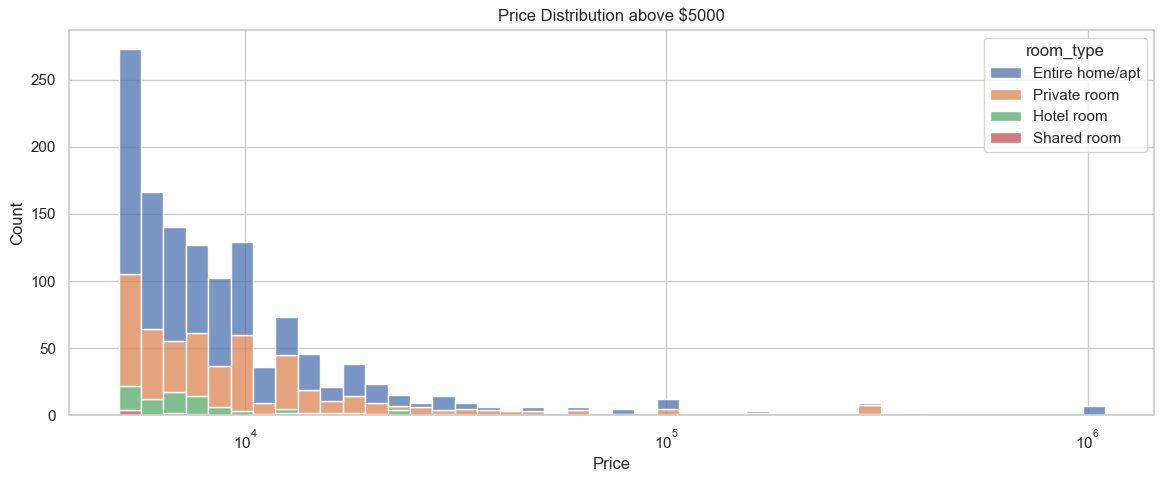

In [37]:
# Define custom bin edges
bins_low = np.arange(0, 5001, 100)
sns.set_theme(style='whitegrid')
plt.figure(figsize=(14,6))
sns.histplot(data=df[df['price'] < 5000], x='price', bins=bins_low, hue='room_type', 
             hue_order=['Entire home/apt','Private room','Hotel room','Shared room'], multiple='stack');
plt.title(f'Price Distribution from $0-5000')
plt.xlabel('Price')

plt.figure(figsize=(14,5))
sns.histplot(data=df[df['price'] >= 5000], x='price', hue='room_type',
             hue_order=['Entire home/apt','Private room','Hotel room','Shared room'], multiple='stack', log_scale=True);
plt.title('Price Distribution above $5000')
plt.xlabel('Price');

From the graph, we can see that the frequency of listings drastically decrese at prices approximately above $11,000 (1.1 x 10<sup>4</sup>).
<br>We will exclude these outliers for the calculation of average prices below.

In [38]:
df_no_price_outlier = df[df['price'] <= 11000]
df_no_price_outlier.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaT,0.00,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaT,0.00,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaT,0.00,3,365,0


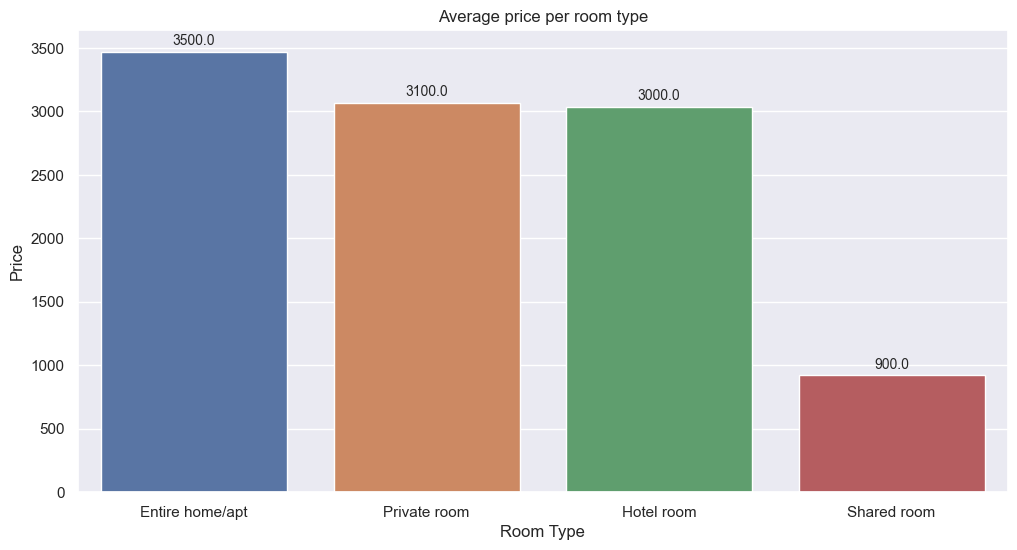

In [39]:
plt.figure(figsize=(12,6));
sns.set_theme()
ax = sns.barplot(data=df,
            x='room_type',
            y='price',
            estimator=np.mean,
            ci=0);
for bar in ax.patches:
    ax.annotate(format(round(bar.get_height(), -2)),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.title('Average price per room type');

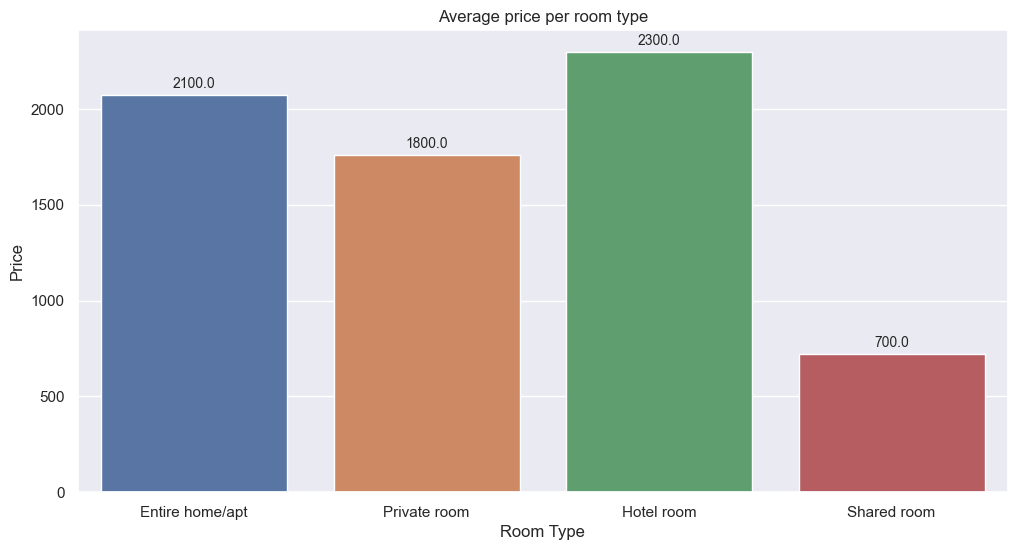

In [40]:
plt.figure(figsize=(12,6));
sns.set_theme()
ax = sns.barplot(data=df_no_price_outlier,
            x='room_type',
            y='price',
            estimator=np.mean,
            ci=0);
for bar in ax.patches:
    ax.annotate(format(round(bar.get_height(), -2)),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.title('Average price per room type');

### **Insights:**
1. Home/apt has the highest average price ($3500), while shared rooms have the lowest average price ($900).
    - However, these averages are heavily skewed due to the presence of large numbers of outliers.
2. After the removal of outliers, hotel rooms have the highest average price ($2300). Shared rooms still have the lowest average price ($700).
    - There is a large change in average prices in home/apt and private room.
3. There is a very wide spread of price distribution, regardless of room type.
4. Shared rooms are the least popular room type, while homes/apartments are the most popular room type.

### **2. Price per Neighborhood** <br>
Find the price of listings in each neighborhood. Which one is the cheapest and most expensive?<br>

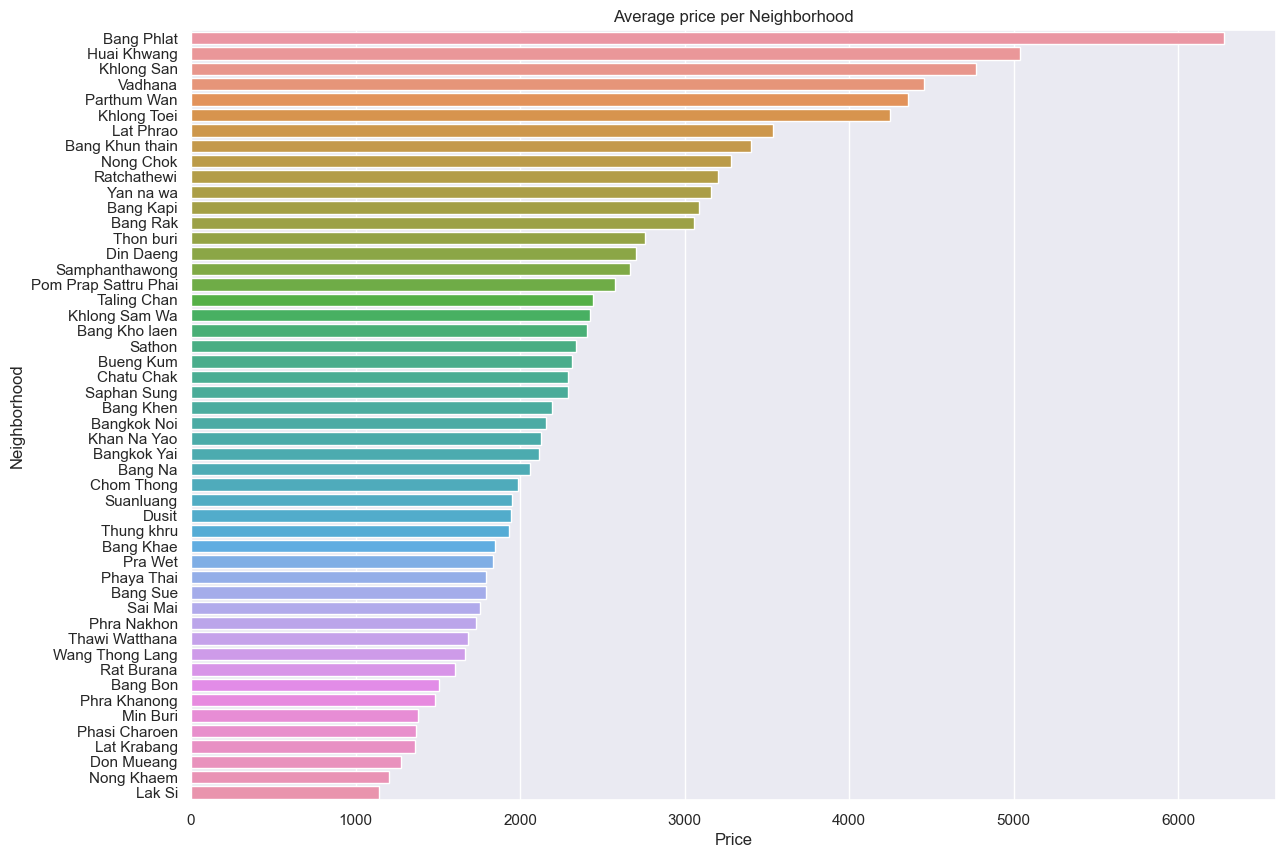

In [41]:
df_neighborhood = df.groupby('neighbourhood')[['price']].mean().sort_values(by='price',ascending=False).reset_index()
plt.figure(figsize=(14,10))
sns.barplot(data=df_neighborhood, y='neighbourhood', x='price', ci=0)
plt.xlabel('Price')
plt.ylabel('Neighborhood')
plt.title('Average price per Neighborhood');

In [42]:
bangkokMap = folium.Map(location=[13.76343889078584, 100.50335761585941],
                        tiles='cartodbpositron', zoom_start=11)

# Top 5 most expensive neighbourhoods
neighborhood_names_high = df_neighborhood.iloc[:5,:]['neighbourhood'].to_list()

# Top 5 least expensive neighbourhoods
neighborhood_names_low = df_neighborhood.iloc[-5:,:]['neighbourhood'].to_list()

# Points of most expensive neighborhoods, highlighting the location of the most expensive listing in neighborhood
for i in neighborhood_names_high:
    df_md = df[df['neighbourhood'] == i][['neighbourhood','price','latitude','longitude','room_type','number_of_reviews']]
    df_md = df_md[df_md['price']==df_md['price'].max()]
    for index, i in df_md.iterrows():
        folium.Marker(location= [i['latitude'], i['longitude']],
                  tooltip= f"Neighborhood: {i['neighbourhood']}",
                  popup= folium.Popup(f"Neighborhood: {i['neighbourhood']}"
                                      f"<br> Highest Price in Neighborhood: ${round(i['price'],-3)}"
                                      f"<br> Room Type: {i['room_type']}"
                                      f"<br> Reviews: {i['number_of_reviews']}", min_width=150,max_width=250),
                  icon= folium.Icon(color='red',
                                icon='home')).add_to(bangkokMap)
        
# Points of least expensive neighborhood, highlighting the location of the most expensive listing in the neighborhood
for i in neighborhood_names_low:
    df_md = df[df['neighbourhood'] == i][['neighbourhood','price','latitude','longitude','room_type','number_of_reviews']]
    df_md = df_md[df_md['price']==df_md['price'].max()]
    for index, i in df_md.iterrows():
        folium.Marker(location= [i['latitude'], i['longitude']],
                  tooltip= f"Neighborhood: {i['neighbourhood']}",
                  popup= folium.Popup(f"Neighborhood: {i['neighbourhood']}"
                                      f"<br> Highest Price in Neighborhood: ${round(i['price'], -2)}"
                                      f"<br> Room Type: {i['room_type']}"
                                      f"<br> Reviews: {i['number_of_reviews']}", min_width=150,max_width=250),
                  icon= folium.Icon(color='blue',
                                icon='home')).add_to(bangkokMap)
        
# City Centre
centre_lat = 13.738717652945653
centre_long = 100.56136714224954
folium.Circle(
    location=[centre_lat, centre_long],
    radius=10000,
    color='green',
    fill=True,
    fill_opacity=0.2,
    tooltip= f"10 km radius from Sukhumvit"
).add_to(bangkokMap)
folium.Marker(location= [centre_lat,centre_long],
                  tooltip= f"Location of Sukhumvit: Bangkok City Centre",
                  popup= folium.Popup(f"This trendy neighborhood is filled with fine restaurants, bars, dance clubs, bookstores, Internet cafes and shopping centers.",
                                      min_width=150,max_width=250),
                  icon= folium.Icon(color='green',
                                icon='info-sign')).add_to(bangkokMap)

bangkokMap

### **Insights:**
1. Top 5 most expensive neighborhoods to book in: 
    - Bang Phlat
    - Huai Khwang 
    - Khlong San
    - Vadhana
    - Parthum Wan <br>
All five of these neighborhoods are located relatively close to Bangkok downtown (Sukhumvit).<br>
<br>
2. Top 5 cheapest neighborhoods to book in:
    - Lak Si
    - Nong Khaem
    - Don Mueang
    - Lat Krabang
    - Phasi Charoen <br>
All five of these neighborhoods are located relatively further away from Bangkok downtown (Sukhumvit).<br>
<br>
Sukhumvit is considered as the city centre of Bangkok, according to TripAdvisor. <br>
(source: https://www.tripadvisor.in/Attraction_Review-g293916-d450966-Reviews-Sukhumvit-Bangkok.html)

### **3. Hosts vs Popularity** <br>
Are hosts with more listings more popular than others? Compare by all-time and recent (last 12 months) <br>
**Hypothesis:** Hosts with more listings lead to higher listing popularity.

<Axes: title={'center': 'Total Listings by Host vs Popularity'}, xlabel='Total Listings by Host', ylabel='Reviews'>

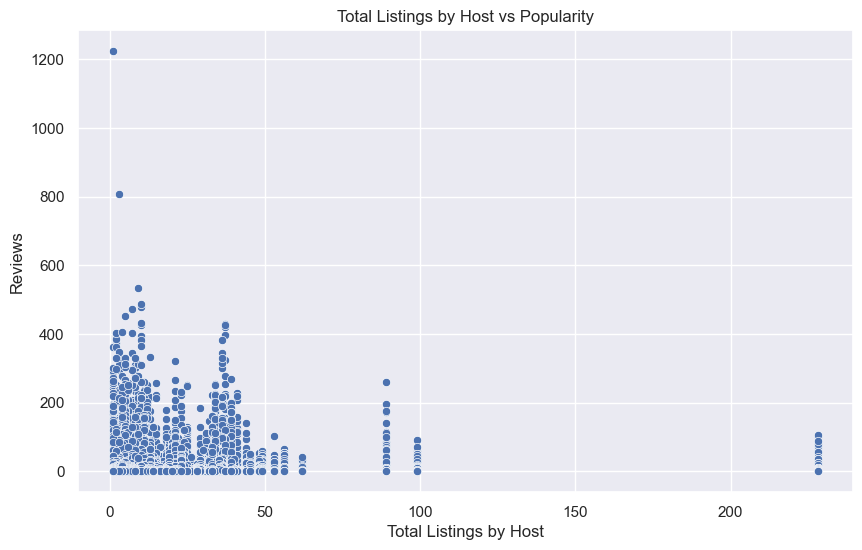

In [43]:
plt.figure(figsize=(10,6))
plt.title('Total Listings by Host vs Popularity')
plt.xlabel('Total Listings by Host')
plt.ylabel('Reviews');
sns.scatterplot(data=df, x='calculated_host_listings_count', y='number_of_reviews')

Majority of the data is found clustered at total host listings <= 80 (approximately). <br>
We will consider total host listings > 80 as outliers, and plot another scatter plot where total host listings < 80.

In [44]:
df_totalhost_no_outlier = df[(df['calculated_host_listings_count'] <= 80)]
df_totalhost_no_outlier.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaT,0.00,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaT,0.00,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaT,0.00,3,365,0


0.20079012848412642

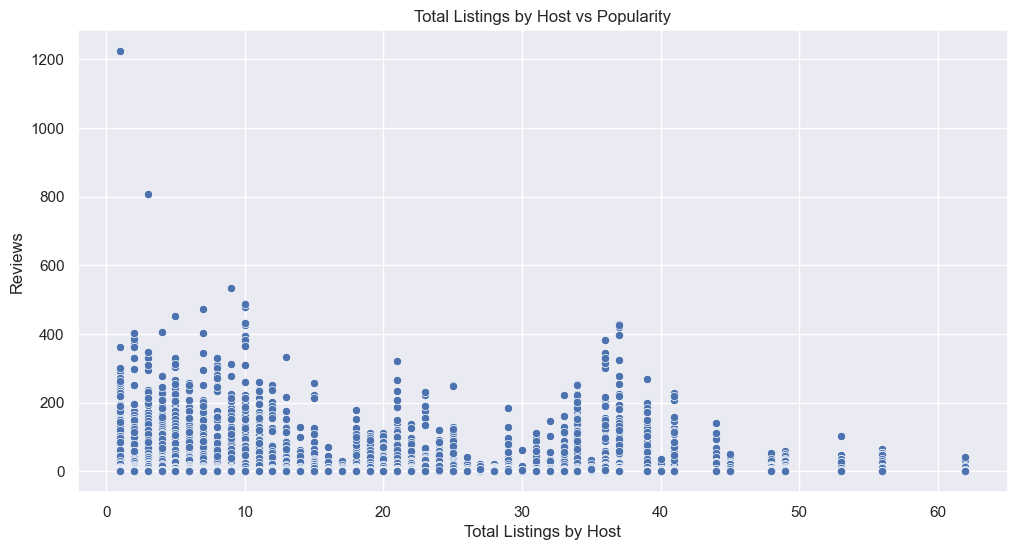

In [45]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_totalhost_no_outlier, x='calculated_host_listings_count', y='number_of_reviews')
plt.title('Total Listings by Host vs Popularity')
plt.xlabel('Total Listings by Host')
plt.ylabel('Reviews');

df_totalhost_no_outlier['calculated_host_listings_count'].corr(df['number_of_reviews'],'spearman')

We will now check for the listings' most recent popularity, by using the number of listings in the last 12 months.

0.2585835138950321

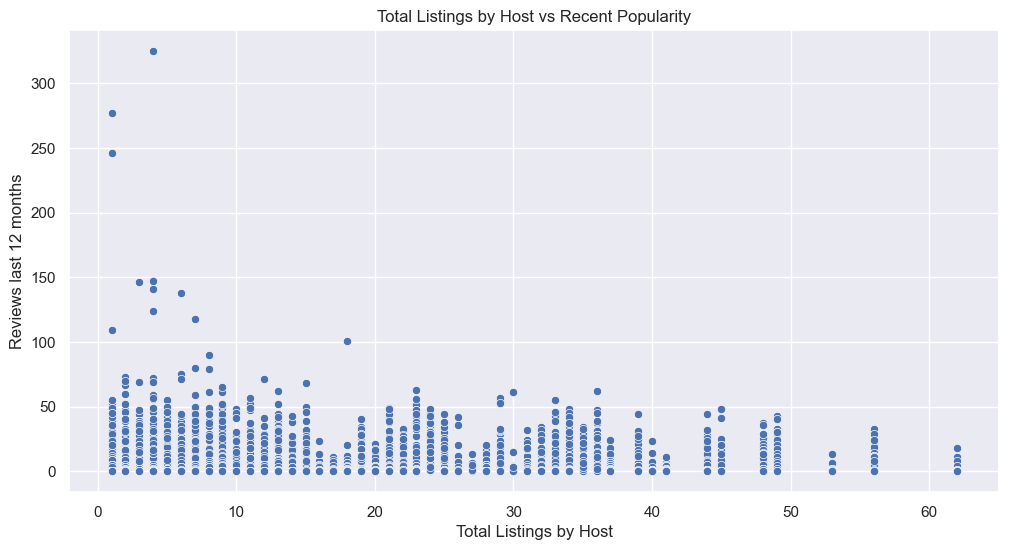

In [46]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_totalhost_no_outlier, x='calculated_host_listings_count', y='number_of_reviews_ltm')
plt.title('Total Listings by Host vs Recent Popularity')
plt.xlabel('Total Listings by Host')
plt.ylabel('Reviews last 12 months');

df_totalhost_no_outlier['calculated_host_listings_count'].corr(df['number_of_reviews_ltm'],'spearman')

### **Insights:**
1. There is a very weak correlation between the total listings by host and the popularity, regardless of all-time popularity (number of reviews) or recent popularity (number of reviews in the last 12 months).
2. However, recent popularity has a stronger correlation with total listings by host.
    - All-Time Popularity vs Listings by Host = 0.2008
    - Recent Popularity vs Listings by Host = 0.2586

### **4. Non-English Listings vs. Popularity** <br>
Some listings contain non-English characters. Do they affect the popularity of listings? <br>
**Hypothesis:** English listings have a far greater popularity than non-English ones.

In [47]:
df['name']

0                          Nice room with superb city view
1                           Easy going landlord,easy place
2                        modern-style apartment in Bangkok
3           Spacious one bedroom at The Kris Condo Bldg. 3
4                               Suite Room 3 at MetroPoint
                               ...                        
15839        素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街
15840    Euro LuxuryHotel PratunamMKt TripleBdNrShoping...
15841    Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea
15842    Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea
15843    Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea
Name: name, Length: 15844, dtype: object

Since non-English characters include numbers, miscellaneous symbols, and emojis, <br>we will be removing them first before determining whether the listing is in English or not.

In [48]:
import re
import string
import emoji

# Deletes emojis in listings
def remove_emojis(text): 
    return ''.join(c for c in text if (emoji.is_emoji(c) == False))

# Deletes miscellaneous symbols in listings
def remove_misc_symbols(text): 
    emoji_pattern = re.compile(pattern="["
                                     u"\U0001F600-\U0001F64F"  # Emojis in the Miscellaneous Symbols and Faces range
                                     u"\U0001F300-\U0001F5FF"  # Emojis in the Miscellaneous Symbols range
                                     u"\U0001F680-\U0001F6FF"  # Emojis in the Transport and Map Symbols range
                                     u"\U0001F700-\U0001F77F"  # Emojis in the Alchemical Symbols range
                                     u"\u2600-\u26FF"  # Miscellaneous Symbols range
                                     u"\u2700-\u27BF"  # Dingbats and Miscellaneous Symbols range
                                     u"\u25A0-\u25FF" # Geometric Shapes range
                                     u"\u1D10-\u1D1F" # Musical Symbols range
                                     u"\u2460-\u24FF" # Enclosed Alphanumeric range
                                     "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# To check if the listing name only contains English words
def contains_only_english_words(input_string): 
    pattern = r'^[a-zA-Z0-9\s' + re.escape(string.punctuation) + ']+$'
    return re.match(pattern, input_string) is not None

df_check = pd.DataFrame()
df_check = df.copy()[['name','number_of_reviews','number_of_reviews_ltm']]

# Creating new column that contains no emojis or miscellaneous symbols
df_check['name_no_emoji'] = df_check['name'].apply(remove_emojis)
df_check['name_no_emoji'] = df_check['name_no_emoji'].apply(remove_misc_symbols)

# From the new column, determine whether the name contains only alphanumeric and symbol characters.
df_check['is_english'] = df_check['name_no_emoji'].apply(contains_only_english_words)
df_check['is_english'] = np.where(df_check['is_english'], 'Yes', 'No')
df_check

,name,number_of_reviews,number_of_reviews_ltm,name_no_emoji,is_english
0,Nice room with superb city view,65,0,Nice room with superb city view,Yes
1,"Easy going landlord,easy place",0,0,"Easy going landlord,easy place",Yes
2,modern-style apartment in Bangkok,0,0,modern-style apartment in Bangkok,Yes
3,Spacious one bedroom at The Kris Condo Bldg. 3,2,1,Spacious one bedroom at The Kris Condo Bldg. 3,Yes
4,Suite Room 3 at MetroPoint,0,0,Suite Room 3 at MetroPoint,Yes
...,...,...,...,...,...
15839,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,0,0,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,No
15840,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,0,0,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,Yes
15841,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,0,0,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Yes
15842,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,0,0,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Yes


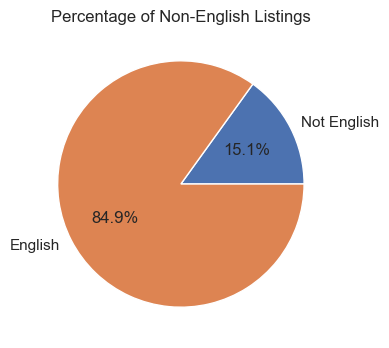

In [49]:
plt.figure(figsize=(10,4))
plt.pie(df_check.groupby('is_english')['name'].count(), labels=['Not English','English'], autopct='%1.1f%%', startangle=0);
plt.title('Percentage of Non-English Listings');

We will now look at how the listing name impacts their all-time popularity and recent popularity.

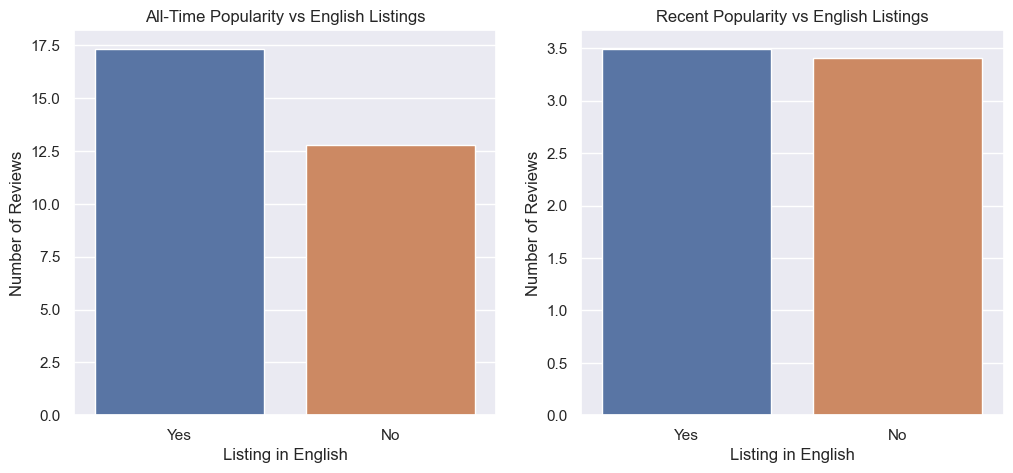

In [50]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.barplot(data=df_check, x='is_english', y='number_of_reviews',errorbar=('ci',0));
plt.xlabel('Listing in English')
plt.ylabel('Number of Reviews')
plt.title('All-Time Popularity vs English Listings');

plt.subplot(1,2,2)
sns.barplot(data=df_check, x='is_english', y='number_of_reviews_ltm',errorbar=('ci',0));
plt.xlabel('Listing in English')
plt.ylabel('Number of Reviews')
plt.title('Recent Popularity vs English Listings');

We will conduct a Mann-Whitney Test to check whether the distribution of English and non-English Listings are similar.

In [51]:
from scipy.stats import mannwhitneyu

# Extract review numbers for English and non-English listings
reviews_english = df_check[df_check['is_english']=='Yes']["number_of_reviews"]
reviews_non_english = df_check[df_check['is_english']=='No']["number_of_reviews"]

# Perform the Mann-Whitney U test
stat, p_value = mannwhitneyu(reviews_english, reviews_non_english, alternative="two-sided")

# Interpret the results
alpha = 0.05
print(f'p_value = {p_value}.')
if p_value < alpha:
    print("Since p_value < 0.05, we reject the null hypothesis: There is a significant difference between distributions.")
else:
    print("Since p_value > 0.05, we fail to reject the null hypothesis: There is no significant difference between distributions.")


p_value = 4.060124183416999e-06.
Since p_value < 0.05, we reject the null hypothesis: There is a significant difference between distributions.


How significant is the difference?

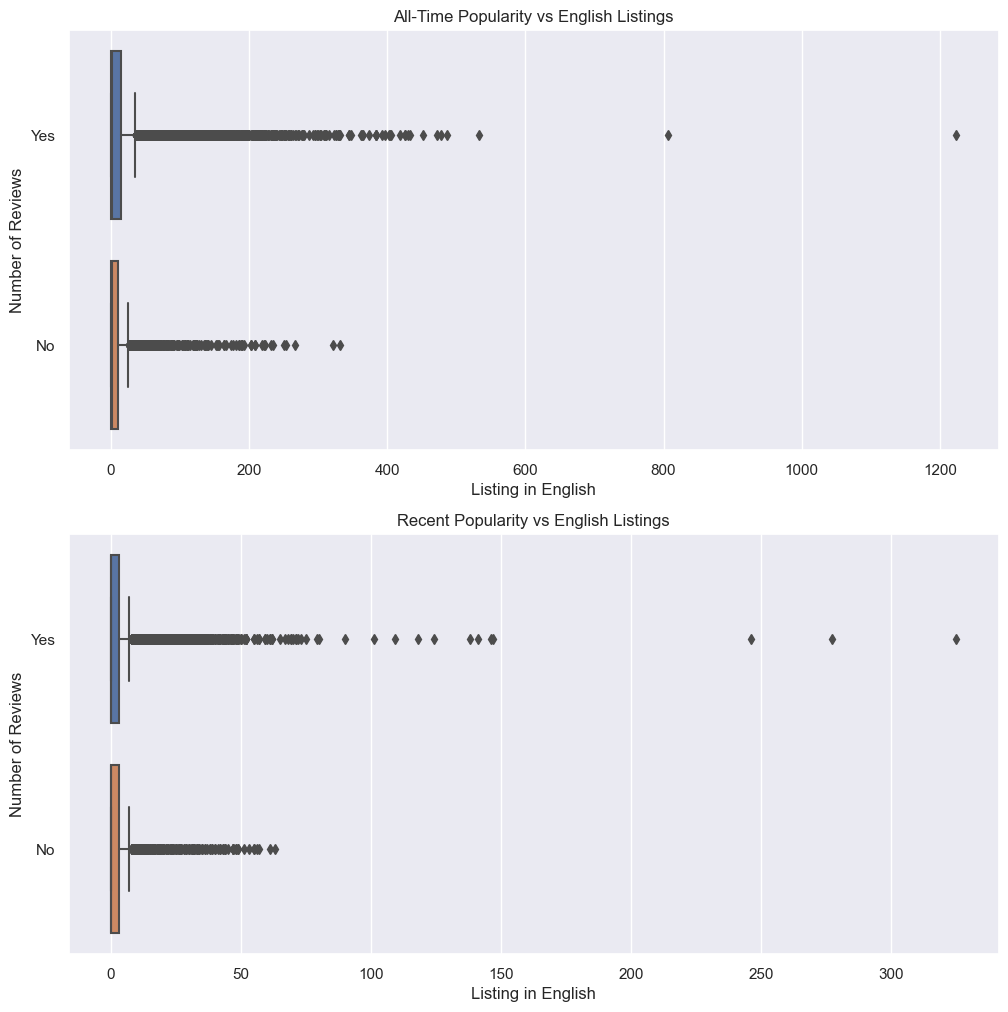

In [52]:
plt.figure(figsize=(12,12))

plt.subplot(2,1,1)
sns.boxplot(data=df_check, y='is_english', x='number_of_reviews');
plt.xlabel('Listing in English')
plt.ylabel('Number of Reviews')
plt.title('All-Time Popularity vs English Listings');

plt.subplot(2,1,2)
sns.boxplot(data=df_check, y='is_english', x='number_of_reviews_ltm');
plt.xlabel('Listing in English')
plt.ylabel('Number of Reviews')
plt.title('Recent Popularity vs English Listings');

### **Insights:**
1. A significant portion of the listings are not in English.
2. English listings are more popular than non-English listings, although the difference is slightly less notable in recent popularity.
3. However, the spread of number of reviews is far greater in English listings than the spread in non-English listings.
    - Non-English listings are more consistent in number of reviews as compared to English listings.

### **5. Price and Minimum Nights vs Occupancy Rate**
Is there a relationship between the price, minimum nights and occupancy rate of the listings? <br>
**Occupancy rate is denoted by the number of reviews per month.** <br>
**Hypothesis:** price and minimum nights have an impact on the occupancy rate of the listings.

**Why do we use occupancy rate instead of recent popularity?**<br>
Occupancy rate takes into account the entire listing history, while adjusting for the listing's age. <br>
On the other hand, recent popularity only takes into account the listing's performance over the past 12 months. <br>

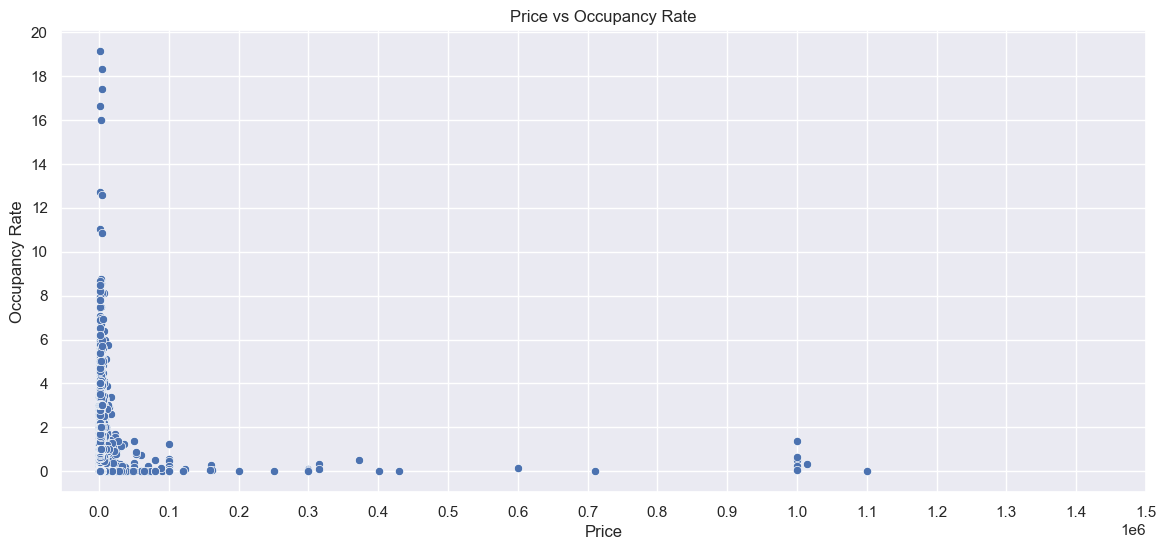

In [53]:
plt.figure(figsize=(14,6))
sns.scatterplot(data=df, x='price', y='reviews_per_month')
plt.xticks(ticks=np.arange(0,1.6e6,1e5))
plt.yticks(ticks=np.arange(0,21.0,2.0))
plt.xlabel('Price')
plt.ylabel('Occupancy Rate')
plt.title('Price vs Occupancy Rate');

There is a large cluster of values in the range 0 - 11,000 (0.11e6). <br>
This range is within the pre-determined price outliers that have been described above. <br>
We will create a separate scatter plot for further analysis.

,price,reviews_per_month
price,1.000000,0.017148
reviews_per_month,0.017148,1.000000


,price,reviews_per_month
price,1.000000,0.033677
reviews_per_month,0.033677,1.000000


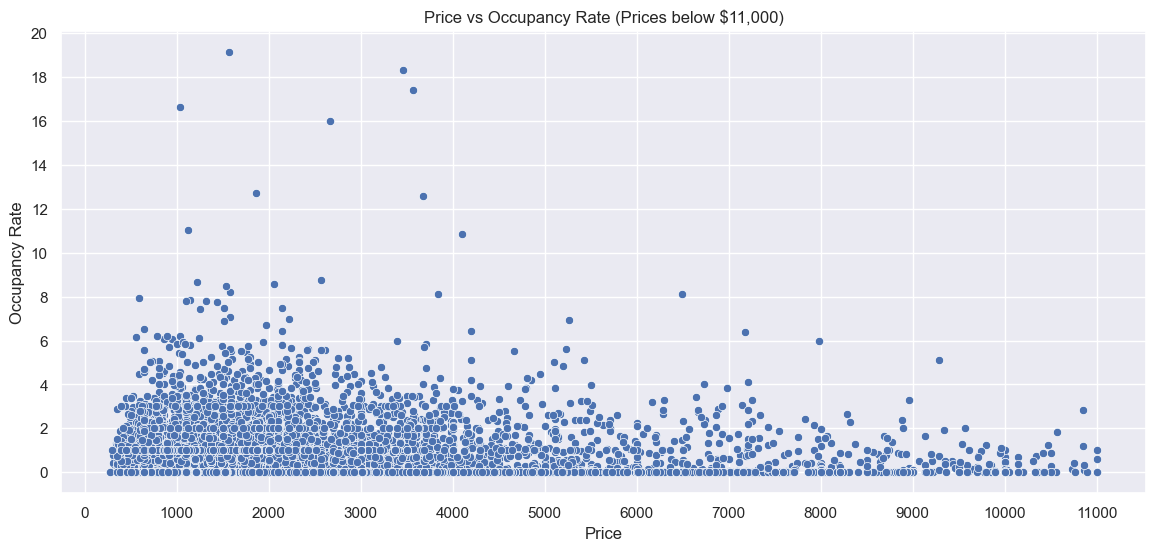

In [54]:
plt.figure(figsize=(14,6))
sns.scatterplot(data=df[df['price']<=11000], x='price', y='reviews_per_month')
plt.xticks(ticks=np.arange(0,11001,1000))
plt.yticks(ticks=np.arange(0,21.0,2.0))
plt.xlabel('Price')
plt.ylabel('Occupancy Rate')
plt.title('Price vs Occupancy Rate (Prices below $11,000)');

display(df[['price','reviews_per_month']].corr('spearman'))
df[df['price']<=11000][['price','reviews_per_month']].corr('spearman')

Now, let's look at the relation between minimum number of nights and occupancy rate.

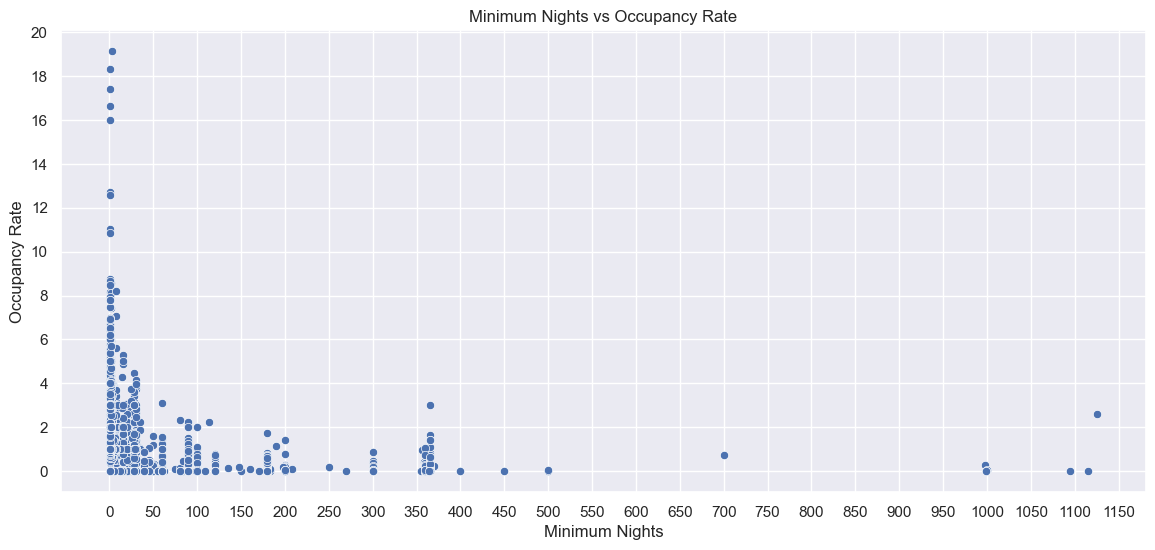

In [55]:
plt.figure(figsize=(14,6))
sns.scatterplot(data=df, x='minimum_nights', y='reviews_per_month')
plt.xticks(ticks=np.arange(0,1151,50))
plt.yticks(ticks=np.arange(0,21.0,2.0))
plt.xlabel('Minimum Nights')
plt.ylabel('Occupancy Rate')
plt.title('Minimum Nights vs Occupancy Rate');

In [56]:
q3 = df['minimum_nights'].describe()['75%']
upperbound = q3 + (iqr(df['minimum_nights'])*1.5)
print(f'Upper bound value= {upperbound}')

Upper bound value= 16.0


Focusing at around 0 - 20 minimum number of nights, based on the upperbound range given above:

,minimum_nights,reviews_per_month
minimum_nights,1.000000,0.019055
reviews_per_month,0.019055,1.000000


,minimum_nights,reviews_per_month
minimum_nights,1.000000,0.132343
reviews_per_month,0.132343,1.000000


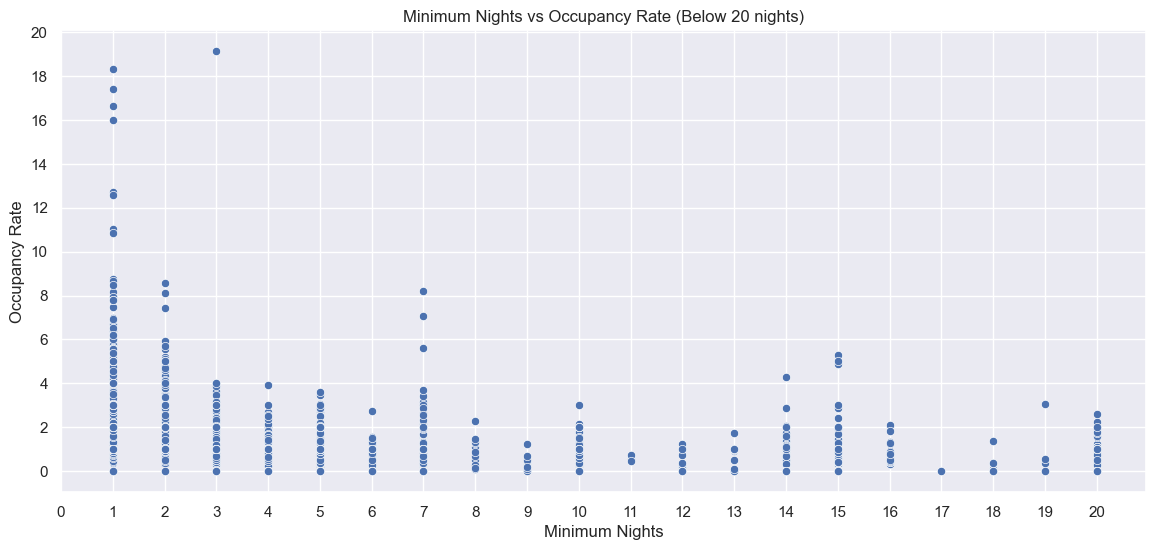

In [57]:
plt.figure(figsize=(14,6))
sns.scatterplot(data=df[df['minimum_nights']<=20], x='minimum_nights', y='reviews_per_month')
plt.xticks(ticks=np.arange(0,21.0,1.0))
plt.yticks(ticks=np.arange(0,21.0,2.0))
plt.xlabel('Minimum Nights')
plt.ylabel('Occupancy Rate')
plt.title('Minimum Nights vs Occupancy Rate (Below 20 nights)');

display(df[['minimum_nights','reviews_per_month']].corr('spearman'))
df[df['minimum_nights']<=20][['minimum_nights','reviews_per_month']].corr('spearman')

### **Insights:**
1. There is a positive correlation between the price of a listing and the occupancy rate of the listing.
    - However, the correlation is extremely weak (0.017266).
    - The correlation is stronger when we exclude the price outliers (0.033796).
2. There is also a positive correlation between the minimum nights required to book the listing and the occupancy rate of the listing.
    - Similarly, the correlation is also extremely weak (0.019123).
    - Correlation becomes stronger when we exclude the minimum nights outliers (0.1324). 
3. From both scatter plots, we notice that clustering occurs at:
    - Prices less than $11,000
    - Minimum nights less than 50 nights (we are aware that this is a different value as compared to the upperbound value found, however, we are taking insight purely from the initial graph.)

## **Conclusion**

### **1. Are the listing prices fair?**
1. **Yes, the listing prices are fair.**
    - From point 2 (Price vs Neighborhood), we can see that listings closer to the city centre are more expensive as compared to listings further away.
    - The city centre contains many tourist attractions, which may explain the popularity of people wanting to stay in listings closer to the centre as compared to listings further away. By supply and demand, since the city centre is generally more populated, the price of listings in these areas will definitely rise. However,
<br><br>
2. **The listing prices are unfair.**
    - From point 1 (Price vs Room Type), we can see that there is an excessively large number of outliers, even when we use our own limit for price outliers at $11,000. This is regardless of room type.
    - Less people are attracted to the listings because the outliers heavily influence the price averages.

### **2. Factors influencing Popularity and Occupancy Rate**
1. **Non-English and English Listings**
    - In general, English listings are more popular than non-English ones.
    - However, non-English listings perform more consistently as compared to English listings. This can be explained through seasonal information, which is unprovided in the data, where tourists that only speak English travel to Thailand and book these English listings during holiday seasons.
2. **Hosts' Total Listings**
    - Contrary to the hypothesis, the total number of listings per host does not significantly affect the popularity of listings.
3. **Price and Minimum Nights**
    - Contrary to the hypothesis, price and minimum nights do not have a significant impact on the occupancy rate of listings.
    - However, minimum nights have a greater impact on the occupancy rate of listings as compared to price.

## **Recommendation**

**For an AirBnB-based business:**
1. Provide listings in a variety of languages.
2. Focus on providing a fair price for the customers.
    - Preferably give a price that is slightly more expensive than the average price for the room type of the listing.
3. Focus on providing a reasonable minimum number of nights.
    - Since AirBnB caters mostly to tourists, they will not stay in Thailand for an extended period of time.